<a href="https://colab.research.google.com/github/itsabhi-nav/.../blob/main/deep_learning_el.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install tensorflow==2.14.0 tensorflow-recommenders==0.6.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import string # for string manipulation operations
import re # for regular expression operations n.

import pandas as pd #for data manipulation and analysis
import numpy as np #for numerical computing
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt #for data visualization
import tensorflow as tf #for building and training deep learning models
import tensorflow_recommenders as tfrs #as a high-level API for building recommendation models on top of TensorFlow
from collections import Counter #for counting occurrences of elements in a list or other iterable
from typing import Dict, Text #for declaring data types in a function or module
from ast import literal_eval #for evaluating strings as code
from datetime import datetime #for working with dates and times
from wordcloud import WordCloud #for generating word clouds from text
from sklearn.preprocessing import MinMaxScaler #for feature scaling
from sklearn.feature_extraction.text import TfidfVectorizer #for converting text into numerical features
from sklearn.metrics.pairwise import cosine_similarity #for measuring similarity between two non-zero vectors of an inner product space.
import random #To generate random numbers to select random movies for user to rate

import warnings
warnings.filterwarnings('ignore')


In [4]:
#Import the required datasets
credits = pd.read_csv('/content/drive/MyDrive/dataset/credits.csv')
keywords = pd.read_csv('/content/drive/MyDrive/dataset/keywords.csv')
movies = pd.read_csv('/content/drive/MyDrive/dataset/movies_metadata.csv').\
                     drop(['belongs_to_collection', 'homepage', 'imdb_id', 'poster_path', 'status', 'title', 'video'], axis=1).\
                     drop([19730, 29503, 35587]) # Incorrect data type

movies['id'] = movies['id'].astype('int64')
#Merge all the datasets together
df = movies.merge(keywords, on='id').merge(credits, on='id')
df.head()

,adult,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,keywords,cast,crew
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Friends are the people who let you be yourself...,6.1,34.0,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Just When His World Is Back To Normal... He's ...,5.7,173.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [5]:
#Fill in the missing values
df['original_language'] = df['original_language'].fillna('')
df['runtime'] = df['runtime'].fillna(0)
df['tagline'] = df['tagline'].fillna('')

df.dropna(inplace=True)

In [6]:
#A function to extract the useful information from the columns
def get_text(text, obj='name'):
    text = literal_eval(text)

    if len(text) == 1:
        for i in text:
            return i[obj]
    else:
        s = []
        for i in text:
            s.append(i[obj])
        return ', '.join(s)

#Applying the functions to the columns
df['genres'] = df['genres'].apply(get_text)
df['production_companies'] = df['production_companies'].apply(get_text)
df['production_countries'] = df['production_countries'].apply(get_text)
df['crew'] = df['crew'].apply(get_text)
df['spoken_languages'] = df['spoken_languages'].apply(get_text)
df['keywords'] = df['keywords'].apply(get_text)

#Create new columns
df['characters'] = df['cast'].apply(get_text, obj='character')
df['actors'] = df['cast'].apply(get_text)

df.drop('cast', axis=1, inplace=True)
df = df[~df['original_title'].duplicated()]
df = df.reset_index(drop=True)

In [7]:
#Cleaned dataset
df.head()

,adult,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,keywords,crew,characters,actors
0,False,30000000,"Animation, Comedy, Family",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,...,373554033.0,81.0,English,,7.7,5415.0,"jealousy, toy, boy, friendship, friends, rival...","John Lasseter, Joss Whedon, Andrew Stanton, Jo...","Woody (voice), Buzz Lightyear (voice), Mr. Pot...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,..."
1,False,65000000,"Adventure, Fantasy, Family",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,...,262797249.0,104.0,"English, Français",Roll the dice and unleash the excitement!,6.9,2413.0,"board game, disappearance, based on children's...","Larry J. Franco, Jonathan Hensleigh, James Hor...","Alan Parrish, Samuel Alan Parrish / Van Pelt, ...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ..."
2,False,0,"Romance, Comedy",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"Warner Bros., Lancaster Gate",United States of America,...,0.0,101.0,English,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,"fishing, best friend, duringcreditsstinger, ol...","Howard Deutch, Mark Steven Johnson, Mark Steve...","Max Goldman, John Gustafson, Ariel Gustafson, ...","Walter Matthau, Jack Lemmon, Ann-Margret, Soph..."
3,False,16000000,"Comedy, Drama, Romance",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,Twentieth Century Fox Film Corporation,United States of America,...,81452156.0,127.0,English,Friends are the people who let you be yourself...,6.1,34.0,"based on novel, interracial relationship, sing...","Forest Whitaker, Ronald Bass, Ronald Bass, Ezr...","Savannah 'Vannah' Jackson, Bernadine 'Bernie' ...","Whitney Houston, Angela Bassett, Loretta Devin..."
4,False,0,Comedy,11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"Sandollar Productions, Touchstone Pictures",United States of America,...,76578911.0,106.0,English,Just When His World Is Back To Normal... He's ...,5.7,173.0,"baby, midlife crisis, confidence, aging, daugh...","Alan Silvestri, Elliot Davis, Nancy Meyers, Na...","George Banks, Nina Banks, Franck Eggelhoffer, ...","Steve Martin, Diane Keaton, Martin Short, Kimb..."


In [8]:
#Information about the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42373 entries, 0 to 42372
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 42373 non-null  object 
 1   budget                42373 non-null  object 
 2   genres                42373 non-null  object 
 3   id                    42373 non-null  int64  
 4   original_language     42373 non-null  object 
 5   original_title        42373 non-null  object 
 6   overview              42373 non-null  object 
 7   popularity            42373 non-null  object 
 8   production_companies  42373 non-null  object 
 9   production_countries  42373 non-null  object 
 10  release_date          42373 non-null  object 
 11  revenue               42373 non-null  float64
 12  runtime               42373 non-null  float64
 13  spoken_languages      42373 non-null  object 
 14  tagline               42373 non-null  object 
 15  vote_average       

In [9]:
#Changing the datatype of certain columns
df['release_date'] = pd.to_datetime(df['release_date'])
df['budget'] = df['budget'].astype('float64')
df['popularity'] = df['popularity'].astype('float64')

In [10]:
#Here, I am choosing movies released after 2009 and which were originally shot in English
df = df[df['release_date'].dt.year>2009]
df = df[df['original_language']=='en']
df = df.reset_index()

In [11]:
#Total number of movies after filtering
df.shape

(8243, 22)

Text(0.5, 1.0, 'The Relationship Between Rating and Popularity')

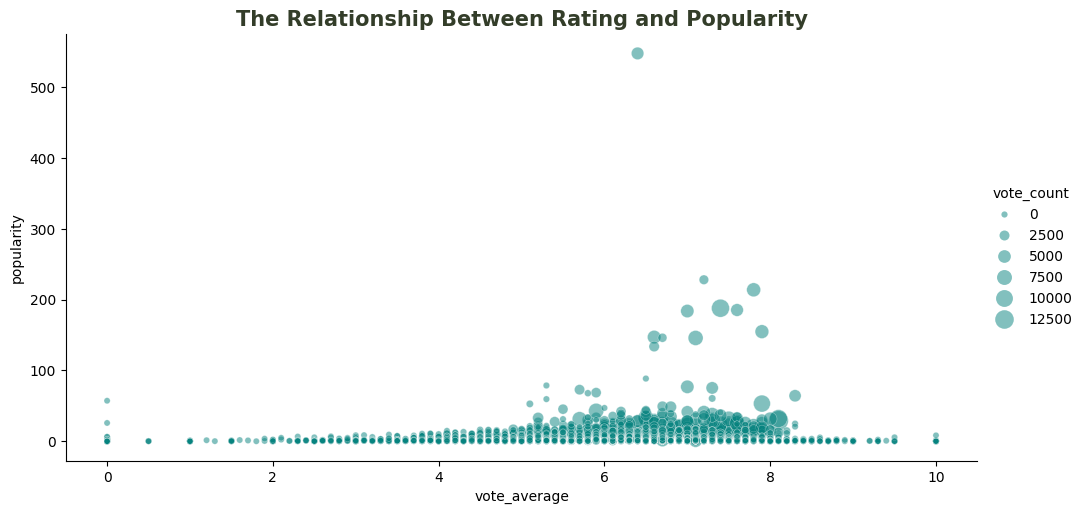

In [12]:
sns.relplot(data=df, x='vote_average', y='popularity', size='vote_count',
            sizes=(20, 200), alpha=.5, aspect=2, color='#06837f')
plt.title('The Relationship Between Rating and Popularity', fontsize=15, weight=600, color='#333d29')

In [13]:
#Importing the dataset of the ratings
ratings_df = pd.read_csv('/content/drive/MyDrive/dataset/ratings.csv')

#Changing the datatype of the 'date' column
ratings_df['date'] = ratings_df['timestamp'].apply(lambda x: datetime.fromtimestamp(x))
ratings_df.drop('timestamp', axis=1, inplace=True)

#Adding the columns from the merged dataset
ratings_df = ratings_df.merge(df[['id', 'original_title', 'genres', 'overview']], left_on='movieId',right_on='id', how='left')
ratings_df = ratings_df[~ratings_df['id'].isna()]
ratings_df.drop('id', axis=1, inplace=True)
ratings_df.reset_index(drop=True, inplace=True)
ratings_df.head()

,userId,movieId,rating,date,original_title,genres,overview
0,7,88744,1.5,2017-02-05 00:19:34,Die Frau mit den 5 Elefanten,"Documentary, Foreign","Documentary about Svetlana Geier, a Ukranian w..."
1,11,47518,3.0,2009-01-11 12:08:08,The Tortured,Horror,An upper-middle-class couple's life is destroy...
2,11,49530,3.5,2009-01-11 12:24:52,In Time,"Action, Thriller, Science Fiction",In the not-too-distant future the aging gene h...
3,11,50601,2.5,2009-01-11 13:02:10,5 Days of War,"War, Drama",An American journalist and his cameraman are c...
4,11,51540,4.0,2009-01-11 12:21:47,Horrible Bosses,"Comedy, Crime","For Nick, Kurt and Dale, the only thing that w..."


In [14]:
#Selecting the id and title column of the merged dataframe
movies_df = df[['id', 'original_title']]
movies_df.rename(columns={'id':'movieId'}, inplace=True)
movies_df.head()


,movieId,original_title
0,79782,Wenecja
1,141210,The Sleepover
2,143750,The Farmer's Wife
3,84198,A Place at the Table
4,171982,Romance


In [15]:
#Selecting the UserId, title, and rating from the ratings dataframe
ratings_df = ratings_df[['userId', 'original_title', 'rating']]
ratings_df.head()

,userId,original_title,rating
0,7,Die Frau mit den 5 Elefanten,1.5
1,11,The Tortured,3.0
2,11,In Time,3.5
3,11,5 Days of War,2.5
4,11,Horrible Bosses,4.0


In [16]:
#Resetting the index of the movies dataframe
movies_df = movies_df.reset_index()
movies_df.head()


,index,movieId,original_title
0,0,79782,Wenecja
1,1,141210,The Sleepover
2,2,143750,The Farmer's Wife
3,3,84198,A Place at the Table
4,4,171982,Romance


In [17]:
#Resetting the index of the merged dataframe
df = df.reset_index()
df.head()
del df['level_0']

In [18]:
#Sorting by popularity to let the user rate the most popular ones
pdf = df.sort_values('popularity', ascending=False)
pdf = pdf.reset_index()
pdf.head()

,level_0,index,adult,budget,genres,id,original_language,original_title,overview,popularity,...,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,keywords,crew,characters,actors
0,4194,28982,False,74000000.0,"Family, Animation, Adventure, Comedy",211672,en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",547.488298,...,1.156731e+09,91.0,English,"Before Gru, they had a history of bad bosses",6.4,4729.0,"assistant, aftercreditsstinger, duringcreditss...","Christopher Meledandri, Kyle Balda, Ken Daurio...","Scarlet Overkill (voice), Herb Overkill (voice...","Sandra Bullock, Jon Hamm, Michael Keaton, Alli..."
1,7837,40726,False,34000000.0,"Action, Crime",339403,en,Baby Driver,After being coerced into working for a crime b...,228.032744,...,2.245113e+08,113.0,English,All you need is one killer track.,7.2,2083.0,"robbery, atlanta, music, crime boss, romance, ...","Edgar Wright, Edgar Wright, Tim Bevan, James B...","Baby, Deborah, Doc, Bats, Buddy, Darling, Jose...","Ansel Elgort, Lily James, Kevin Spacey, Jamie ..."
2,2752,23304,False,165000000.0,"Adventure, Family, Animation, Action, Comedy",177572,en,Big Hero 6,The special bond that develops between plus-si...,213.849907,...,6.521054e+08,102.0,English,From the creators of Wreck-it Ralph and Frozen,7.8,6289.0,"brother brother relationship, hero, talent, re...","John Lasseter, Robert Richardson, Mark Henley,...","Baymax (voice), Hiro Hamada (voice), Tadashi H...","Scott Adsit, Ryan Potter, Daniel Henney, T.J. ..."
3,3270,25206,False,58000000.0,"Action, Adventure, Comedy",293660,en,Deadpool,Deadpool tells the origin story of former Spec...,187.860492,...,7.831130e+08,108.0,English,Witness the beginning of a happy ending,7.4,11444.0,"anti hero, mercenary, marvel comic, superhero,...","Robert Alonzo, Tim Miller, Rhett Reese, Paul W...","Wade Wilson / Deadpool, Vanessa Carlysle / Cop...","Ryan Reynolds, Morena Baccarin, Ed Skrein, T.J..."
4,3272,25208,False,200000000.0,"Action, Adventure, Comedy, Science Fiction",283995,en,Guardians of the Galaxy Vol. 2,The Guardians must fight to keep their newfoun...,185.330992,...,8.634161e+08,137.0,English,Obviously.,7.6,4858.0,"sequel, superhero, based on comic, misfit, spa...","Lisa J. Levine, Jason C. Lewis, Lora Hirschber...","Peter Quill / Star-Lord, Gamora, Drax the Dest...","Chris Pratt, Zoe Saldana, Dave Bautista, Vin D..."


In [20]:
#Random number generation for the user to rate movies out of 5
user_id = 270897
m = 3
randomList = []
for i in range(10):
    r=random.randint(1,10)
    if r not in randomList:
        randomList.append(r)

print("Welcome")
name = input("Enter your name:")

for i in randomList:
    movie = pdf['original_title'][i]
    print(i)

    movie_row = pdf[pdf['original_title'] == movie]
    print()
    print(movie)
    print("Overview: ", pdf[pdf['original_title'] == movie]['overview'][i])
    print("Cast: ", pdf[pdf['original_title'] == movie]['actors'][i])
    user_r = input('Enter your rating out of 5 (Enter dk if you dont know the movie)')
    if(user_r=='dk'):
        continue;
    else:
        user_r = int(user_r)
        new_row = pd.DataFrame({'userId': [user_id], 'original_title': [movie], 'rating': [user_r]})
        ratings_df = pd.concat([ratings_df, new_row], ignore_index=True)

# Optionally, you might want to reset the index of `ratings_df` to avoid duplicates in the future.
ratings_df = ratings_df.reset_index(drop=True)


Welcome
Enter your name:abhi
9

Captain America: Civil War
Overview:  Following the events of Age of Ultron, the collective governments of the world pass an act designed to regulate all superhuman activity. This polarizes opinion amongst the Avengers, causing two factions to side with Iron Man or Captain America, which causes an epic battle between former allies.
Cast:  Chris Evans, Robert Downey Jr., Scarlett Johansson, Sebastian Stan, Anthony Mackie, Don Cheadle, Jeremy Renner, Chadwick Boseman, Paul Bettany, Elizabeth Olsen, Paul Rudd, Emily VanCamp, Tom Holland, Frank Grillo, William Hurt, Daniel Brühl, Martin Freeman, John Slattery, Marisa Tomei, Hope Davis, John Kani, Kerry Condon, Gene Farber, Florence Kasumba, Alfre Woodard, Jim Rash, Stan Lee, Joe Russo, Damion Poitier, Michael A. Cook, Laughton Parchment, Jackson Spidell, Yi Long, Heidi Moneymaker, Aaron Toney, Cale Schultz, Ann Russo, Cornell John, Sven Hönig, Joshua Peck, Brent McGee, Be Satrazemis, Blair Jasin, Oli Bigalke

In [21]:
#Changing the datatype to string
ratings_df['userId'] = ratings_df['userId'].astype(str)

#Creating data for the model
ratings = tf.data.Dataset.from_tensor_slices(dict(ratings_df[['userId', 'original_title', 'rating']]))
movies = tf.data.Dataset.from_tensor_slices(dict(movies_df[['original_title']]))

ratings = ratings.map(lambda x: {
    "original_title": x["original_title"],
    "userId": x["userId"],
    "rating": float(x["rating"])
})

movies = movies.map(lambda x: x["original_title"])

In [22]:
#Displaying the total data
print('Total Data: {}'.format(len(ratings)))

tf.random.set_seed(42)
shuffled = ratings.shuffle(100_000, seed=42, reshuffle_each_iteration=False)

train = ratings.take(35_000)
test = ratings.skip(35_000).take(8_188)

Total Data: 109493


In [23]:
#Displaying the total number of unique movies and users
movie_titles = movies.batch(1_000)
user_ids = ratings.batch(1_000).map(lambda x: x["userId"])

unique_movie_titles = np.unique(np.concatenate(list(movie_titles)))
unique_user_ids = np.unique(np.concatenate(list(user_ids)))

print('Unique Movies: {}'.format(len(unique_movie_titles)))
print('Unique users: {}'.format(len(unique_user_ids)))


Unique Movies: 8243
Unique users: 36333


In [24]:
class MovieModel(tfrs.models.Model):

    def __init__(self, rating_weight: float, retrieval_weight: float) -> None:
        super().__init__()

        embedding_dimension = 64

        # User and movie models.
        self.movie_model: tf.keras.layers.Layer = tf.keras.Sequential([
            tf.keras.layers.StringLookup(
                vocabulary=unique_movie_titles, mask_token=None),
            tf.keras.layers.Embedding(len(unique_movie_titles) + 1, embedding_dimension)
        ])
        self.user_model: tf.keras.layers.Layer = tf.keras.Sequential([
            tf.keras.layers.StringLookup(
                vocabulary=unique_user_ids, mask_token=None),
            tf.keras.layers.Embedding(len(unique_user_ids) + 1, embedding_dimension)
        ])

        # A small model to take in user and movie embeddings and predict ratings.
        self.rating_model = tf.keras.Sequential([
            tf.keras.layers.Dense(256, activation="relu"),
            tf.keras.layers.Dense(128, activation="relu"),
            tf.keras.layers.Dense(1),
        ])

        # Create a dataset for candidates.
        self.candidate_movie_embeddings = (
            tf.data.Dataset.from_tensor_slices(unique_movie_titles)
            .batch(128)
            .map(self.movie_model)
        )

        # The tasks.
        self.rating_task: tf.keras.layers.Layer = tfrs.tasks.Ranking(
            loss=tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.RootMeanSquaredError()],
        )

        self.retrieval_task: tf.keras.layers.Layer = tfrs.tasks.Retrieval(
            metrics=tfrs.metrics.FactorizedTopK(candidates=self.candidate_movie_embeddings)
        )

        # The loss weights.
        self.rating_weight = rating_weight
        self.retrieval_weight = retrieval_weight

    def call(self, features: Dict[Text, tf.Tensor]) -> tf.Tensor:
        # We pick out the user features and pass them into the user model.
        user_embeddings = self.user_model(features["userId"])
        # And pick out the movie features and pass them into the movie model.
        movie_embeddings = self.movie_model(features["original_title"])

        return (
            user_embeddings,
            movie_embeddings,
            # We apply the multi-layered rating model to a concatenation of
            # user and movie embeddings.
            self.rating_model(
                tf.concat([user_embeddings, movie_embeddings], axis=1)
            ),
        )

    def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:
        ratings = features.pop("rating")

        user_embeddings, movie_embeddings, rating_predictions = self(features)

        # We compute the loss for each task.
        rating_loss = self.rating_task(labels=ratings, predictions=rating_predictions)
        retrieval_loss = self.retrieval_task(user_embeddings, movie_embeddings)

        # And combine them using the loss weights.
        return (self.rating_weight * rating_loss + self.retrieval_weight * retrieval_loss)


In [26]:


# Creating a model based on the above Class definition
model = MovieModel(rating_weight=1.0, retrieval_weight=1.0)
model.compile(optimizer=tf.keras.optimizers.Adagrad(0.1))

# Prepare the data
cached_train = train.shuffle(100_000).batch(1_000).cache()
cached_test = test.batch(1_000).cache()

# Train the model
model.fit(cached_train, epochs=3)

# Optionally evaluate the model
# model.evaluate(cached_test)

Epoch 1/3
1/1 [==============================] - 4s 4s/step - root_mean_squared_error: 4.1009 - factorized_top_k/top_1_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_5_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_10_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_50_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_100_categorical_accuracy: 0.0000e+00 - loss: 18.2038 - regularization_loss: 0.0000e+00 - total_loss: 18.2038
Epoch 2/3
1/1 [==============================] - 0s 253ms/step - root_mean_squared_error: 2.2658 - factorized_top_k/top_1_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_5_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_10_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_50_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_100_categorical_accuracy: 0.0000e+00 - loss: 6.5204 - regularization_loss: 0.0000e+00 - total_loss: 6.5204
Epoch 3/3
1/1 [==============================] - 0s 222ms/step - root_mean_squa

In [27]:
#Evaluating the model
metrics = model.evaluate(cached_test, return_dict=True)

print(f"\nRetrieval top-100 accuracy: {metrics['factorized_top_k/top_100_categorical_accuracy']:.3f}")
print(f"Ranking RMSE: {metrics['root_mean_squared_error']:.3f}")

1/1 [==============================] - 1s 717ms/step - root_mean_squared_error: 3.9091 - factorized_top_k/top_1_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_5_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_10_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_50_categorical_accuracy: 1.0000 - factorized_top_k/top_100_categorical_accuracy: 1.0000 - loss: 15.2812 - regularization_loss: 0.0000e+00 - total_loss: 15.2812

Retrieval top-100 accuracy: 1.000
Ranking RMSE: 3.909


In [29]:
#A function to recommend movies to the user
def predict_movie(user, top_n=3):
    # Create a model that takes in raw query features, and
    index = tfrs.layers.factorized_top_k.BruteForce(model.user_model)
    # recommends movies out of the entire movies dataset.
    index.index_from_dataset(
      tf.data.Dataset.zip((movies.batch(100), movies.batch(100).map(model.movie_model)))
    )

    # Get recommendations.
    _, titles = index(tf.constant([str(user)]))

    print('Top {} recommendations for user {}:\n'.format(top_n, name))
    for i, title in enumerate(titles[0, :top_n].numpy()):
        print('{}. {}'.format(i+1, title.decode("utf-8")))

#Predict the rating a user will give for a movie
def predict_rating(user, movie):
    trained_movie_embeddings, trained_user_embeddings, predicted_rating = model({
          "userId": np.array([str(user)]),
          "original_title": np.array([movie])
      })
    print("Predicted rating for {}: {}".foxrmat(movie, predicted_rating.numpy()[0][0]))

In [30]:
#Displaying the movies and ratings of the user
ratings_df[ratings_df['userId']=='270897']

,userId,original_title,rating
109485,270897,Gone Girl,4.0
109486,270897,Pirates of the Caribbean: Dead Men Tell No Tales,2.0
109487,270897,Captain America: Civil War,1.0
109488,270897,War for the Planet of the Apes,1.0
109489,270897,Gone Girl,1.0
109490,270897,Baby Driver,1.0
109491,270897,Guardians of the Galaxy Vol. 2,1.0
109492,270897,Pirates of the Caribbean: Dead Men Tell No Tales,1.0


In [31]:
#Predicting the movies for the users
predict_movie(270897, 5)

Top 5 recommendations for user abhi:

1. Barbie: The Pearl Princess
2. Such Good People
3. Bill Maher: '...But I'm Not Wrong'
4. Restrepo
5. Mr. Holmes


In [32]:
#Get meta data for recommendations
index = tfrs.layers.factorized_top_k.BruteForce(model.user_model)
# recommends movies out of the entire movies dataset.
index.index_from_dataset(
  tf.data.Dataset.zip((movies.batch(100), movies.batch(100).map(model.movie_model)))
)

#Store the details of the recommendations in a new datafram
_, titles = index(tf.constant(['270897']))
pred_movies = pd.DataFrame({'original_title': [i.decode('utf-8') for i in titles[0,:5].numpy()]})

pred_df = pred_movies.merge(df[['original_title', 'genres', 'overview', 'actors']], on='original_title', how='left')
pred_df = pred_df[~pred_df['original_title'].duplicated()]
pred_df.reset_index(drop=True, inplace=True)
pred_df.index = np.arange(1, len(pred_df)+1)


In [33]:
#Displaying the details of the recommendations
for i in range(1,6):
    print("Details about your recommendations:")
    print("Number: ", i)
    print("Movie: ", pred_df['original_title'][i])
    print("Overview: ", pred_df['overview'][i])
    print("Genres: ", pred_df['genres'][i])
    print("Cast: ", pred_df['actors'][i])
    print()

Details about your recommendations:
Number:  1
Movie:  Barbie: The Pearl Princess
Overview:  Barbie plays Lumina, a mermaid girl with the power to change the color of pearls. Cheerful and creative, Lumina finds herself working in a mermaid salon customizing fabulous hairstyles. And when Lumina has the chance to attend the royal ball, her friends adorn her with a gown fit for a princess. At the ball, villains try to seize power over the kingdom, and Lumina finds within herself an unexpected power that proves she is much more than a hair stylist.
Genres:  Family, Animation
Cast:  Brian Doe, Katie Crown, Patrick Gilmore, Simon Hill, Kelly Sheridan, Mark Oliver, Rebecca Shoicet, Patricia Pattenden, Peter New, Kathleen Barr, Lois Chirillo, James Higuchi, Mackenzie Porter, Nicki Burke, Jeff Evans Todd, Tabitha St. Germain, John Novak

Details about your recommendations:
Number:  2
Movie:  Such Good People
Overview:  A young couple discovers a secret room filled with cash while house-sitting 

In [34]:
print("Well that being said, I honestly hope these sound like movies you will watch")

Well that being said, I honestly hope these sound like movies you will watch
